In [2]:
import os
import random
from tqdm import tqdm

In [3]:
from platform import python_version
print(python_version())

3.9.7


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
tf.config.run_functions_eagerly(True)
import pickle



In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, save_model
from sklearn.preprocessing import LabelEncoder

In [7]:
from tensorflow.keras.applications import EfficientNetB0
from keras.applications import ResNet152V2
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [8]:
os.listdir("C:\\Users\\USER\\Desktop\\Brains\\Training")


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [9]:
root = "C:\\Users\\USER\\Desktop\\Brains/"

In [10]:
classes_ = os.listdir("C:\\Users\\USER\\Desktop\\Brains\\Training")

In [11]:
train_dir = root+"Training/"
test_dir = root+ "Testing/"

In [12]:
files_path_dict = {}
for class_ in os.listdir(train_dir):
    files_path_dict[class_] = list(map(lambda x: train_dir+class_+'/'+x, os.listdir(train_dir+class_)))

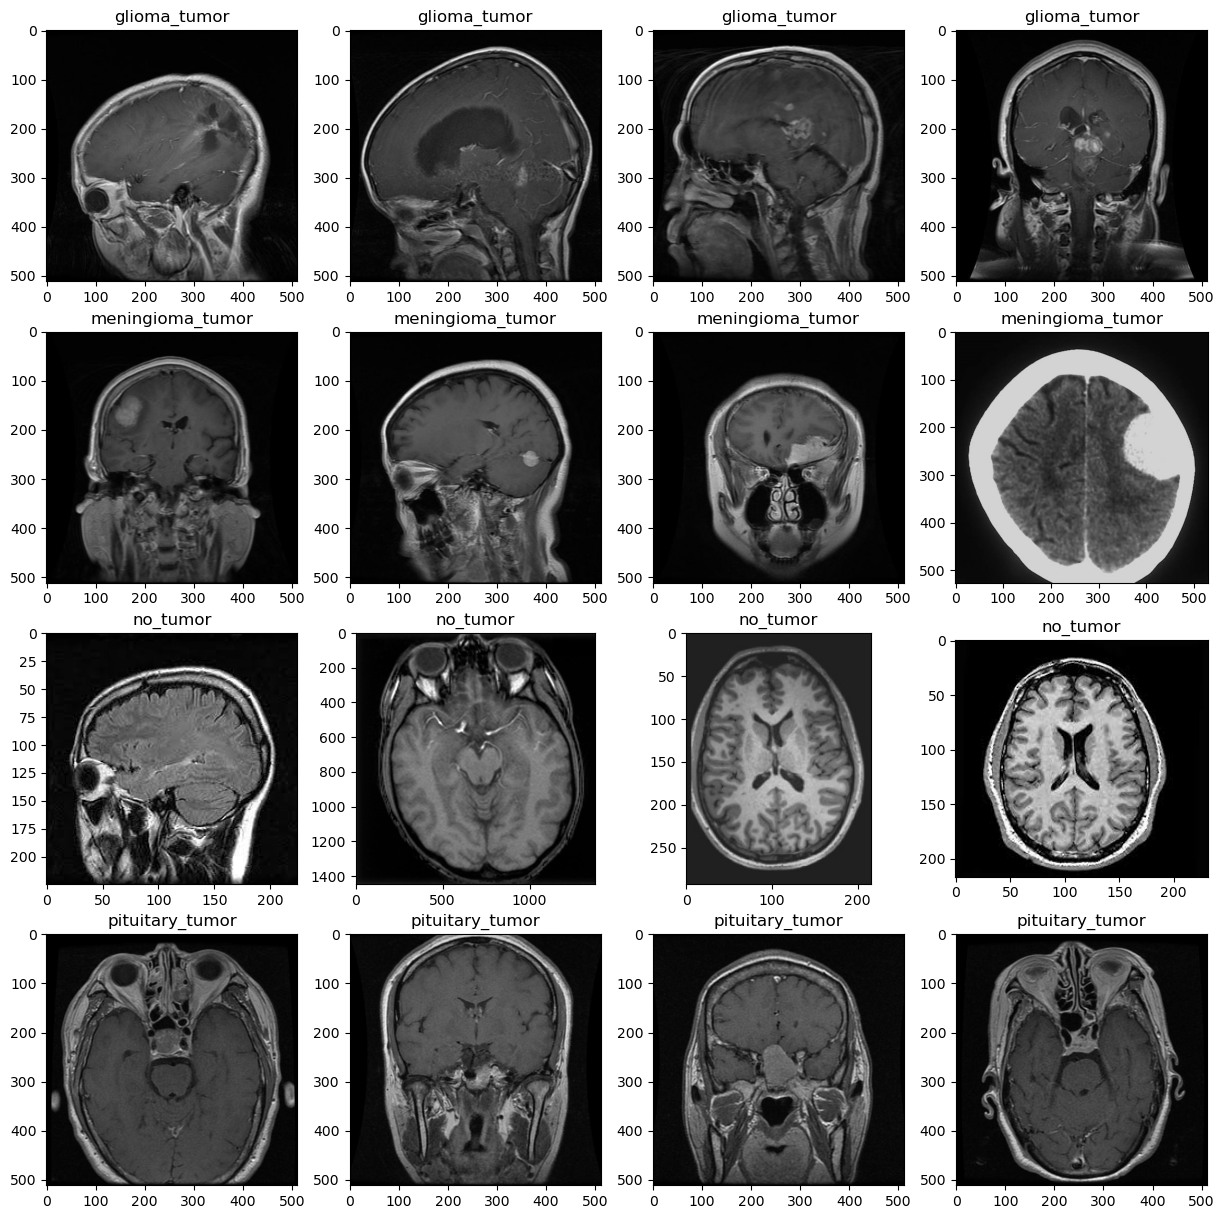

In [13]:
plt.figure(figsize=(15,15))

ind=0
for c in classes_:
    random.shuffle(files_path_dict[c])
    path_lis = files_path_dict[c][:5]
    
    for i in range(1, 5):
        ind+=1
        plt.subplot(4,4,ind)
        
        plt.imshow(load_img(path_lis[i]))
        plt.title(c)

In [14]:
#Feeding Training Data to X_train and y_train
#Glioma (0) Meningioma(1) No_Tumour (2) Pituitary(3)

train_glioma = train_dir + "glioma_tumor"
train_meningioma = train_dir + "meningioma_tumor"
train_no_tumour = train_dir + "no_tumor"
train_pituitary = train_dir + "pituitary_tumor"

X_train = []
y_train = []

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Meningioma')
    
for i in tqdm(os.listdir(train_no_tumour)):
    path = os.path.join(train_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('No_Tumour')   
    
for i in tqdm(os.listdir(train_pituitary)):
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Pituitary')   

100%|██████████| 827/827 [00:03<00:00, 221.36it/s]


In [15]:
#Feeding Testing Data to X_train and y_train
#Glioma (0) Meningioma(1) No_Tumour (2) Pituitary(3)

test_glioma = test_dir + "glioma_tumor"
test_meningioma = test_dir + "meningioma_tumor"
test_no_tumour = test_dir + "no_tumor"
test_pituitary = test_dir + "pituitary_tumor"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Meningioma')
    

for i in tqdm(os.listdir(test_no_tumour)):
    path = os.path.join(test_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('No_Tumour') 
    
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Pituitary')

100%|██████████| 74/74 [00:00<00:00, 96.35it/s] 


In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Image shape:", X_train.shape[1:])
print("Number of Training samples:", X_train.shape[0])

Image shape: (224, 224, 3)
Number of Training samples: 2870


In [17]:
X_test = np.array(X_test)
y_test = np.array(y_test)

print("Image shape:", X_test.shape[1:])
print("Number of Testing samples:", X_test.shape[0])

Image shape: (224, 224, 3)
Number of Testing samples: 394


In [19]:
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_train)
plt.title("Train class balance")
plt.show()

ValueError: could not convert string to float: 'Glioma'

<Figure size 900x500 with 0 Axes>

In [20]:
plt.figure(figsize=(9,5))
sns.countplot(y_test)
plt.title('Test class balance')
plt.show()

ValueError: could not convert string to float: 'Glioma'

<Figure size 900x500 with 0 Axes>

In [21]:
LE = LabelEncoder() # initialize encoder
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)

In [22]:
print(y_train)
print(y_train.shape)
print("Unique Counts:")
unique,counts = np.unique(y_train,return_counts=True)
print(unique,counts)

[0 0 0 ... 3 3 3]
(2870,)
Unique Counts:
[0 1 2 3] [826 822 395 827]


In [23]:
print(y_test)
print(y_test.shape)
print("Unique Counts:")
unique1,counts1 = np.unique(y_test,return_counts=True)
print(unique1,counts1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
(394,)
Unique Counts:
[0 1 2 3] [100 115 105  74]


In [24]:
y_train = to_categorical(y_train)#num_classes = 4
y_train.shape

(2870, 4)

In [25]:
y_test = to_categorical(y_test)#num_classes = 4
y_test.shape

(394, 4)

In [26]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)#rescale=(1./255),
test_datagen = ImageDataGenerator()#rescale=(1./255)

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


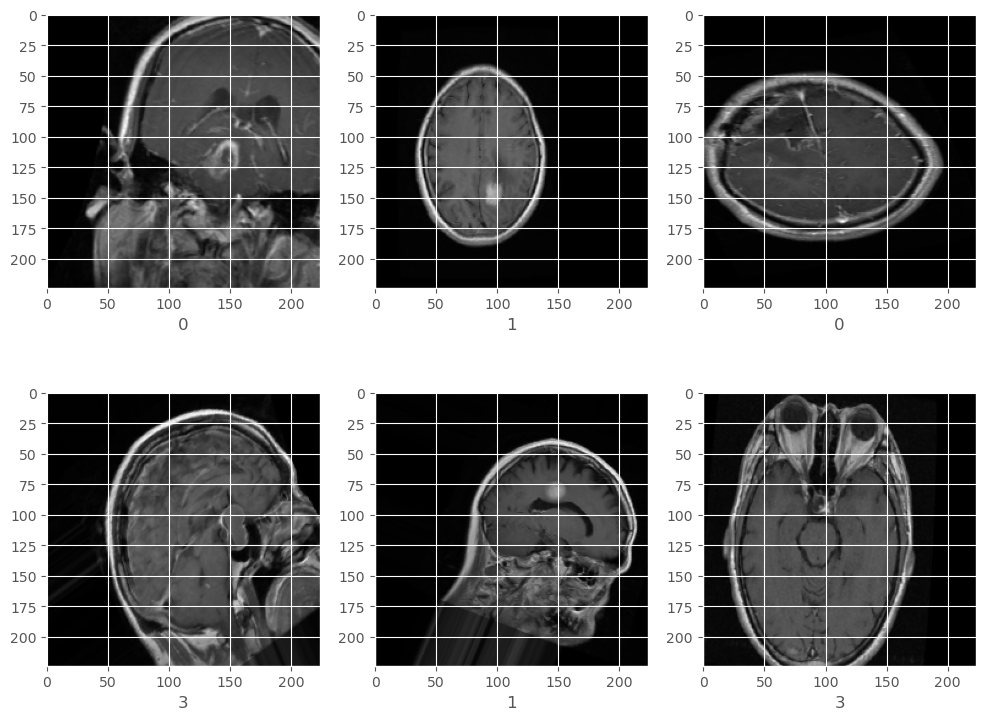

In [27]:
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

In [28]:
effnet = EfficientNetB0(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

In [29]:
# Adding global pooling

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = effnet.input,outputs = model)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [41]:
# compiling model

model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"],run_eagerly=True)

checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)



In [42]:
#takes a long time
history = model.fit(X_train,y_train,epochs=100,validation_data = (X_test,y_test),verbose=1,
                              callbacks=[checkpoint,reduce_lr,earlystop])

Epoch 1/6


C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


90/90 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9812 
Epoch 1: val_accuracy improved from -inf to 0.72843, saving model to effnet.h5
90/90 [==============================] - 1396s 16s/step - loss: 0.0534 - accuracy: 0.9812 - val_loss: 1.2034 - val_accuracy: 0.7284 - lr: 1.0000e-04
Epoch 2/6
90/90 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9948 
Epoch 2: val_accuracy improved from 0.72843 to 0.81726, saving model to effnet.h5
90/90 [==============================] - 1519s 17s/step - loss: 0.0207 - accuracy: 0.9948 - val_loss: 1.0526 - val_accuracy: 0.8173 - lr: 1.0000e-04
Epoch 3/6
90/90 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9948 
Epoch 3: val_accuracy did not improve from 0.81726
90/90 [==============================] - 1797s 20s/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 1.1437 - val_accuracy: 0.7995 - lr: 1.0000e-04
Epoch 4/6
90/90 [==============================] - ETA: 0s - loss: 0.

In [43]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

13/13 [==============================] - 56s 4s/step - loss: 1.3943 - accuracy: 0.7792
Validation Loss: 1.3942809104919434
Validation Accuracy: 0.779187798500061


ValueError: x and y must have same first dimension, but have shapes (18,) and (6,)

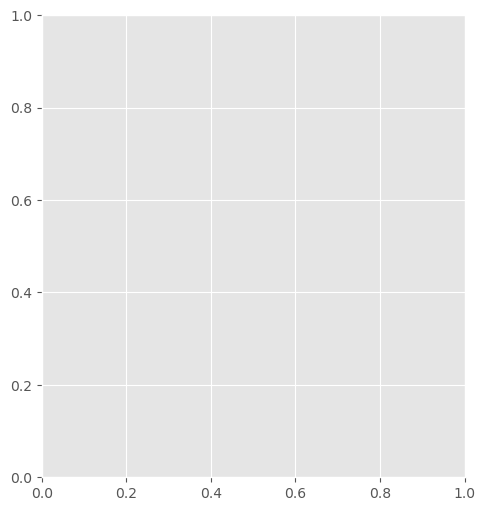

In [44]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,19)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

In [ ]:
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score, recall_score,roc_auc_score,precision_score


clf_report = classification_report(y_test_new,y_pred)
print(clf_report)
print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test_new, y_pred)))
print('Model F1 score  : {0:0.4f}'. format(f1_score(y_test_new, y_pred, average='weighted')))
print('Model Recall score  : {0:0.4f}'. format(recall_score(y_test_new, y_pred,average='weighted')))
#print('Model AUC score : {0:0.4f}'. format(roc_auc_score(y_test_new, y_pred,multi_class='ovr')))
print('Model Precision  : {0:0.4f}'. format(precision_score(y_test_new, y_pred,average='weighted')))

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ['Glioma',
                                                                 'Meningioma','No_Tumour','Pituitary'],
                      show_normed=True);

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    pred_res = "Correctly predicted!"
    sample_idx = random.choice(range(len(X_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[sample_idx])
    if y_pred[sample_idx] != y_test_new[sample_idx]:
        pred_res = "Mispredicted!"
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}\n {pred_res}")
    
model.save('mri_finalcnn2.model')
    
plt.tight_layout()
plt.show()

In [ ]:
tf.keras.utils.plot_model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
   
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    
)
